# 1.0 Data Exploration for Boxing Punch Predictions
This notebook explores the data collected from our boxing videos, using the pose estimation model

## Importing Libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [2]:
# set plot style
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.5)

## Load the Data

In [3]:
# load the data
def load_data(data_dir):
    all_files = glob(os.path.join(data_dir, "boxing_data_*.csv"))
    dataframes = {}
    for file in all_files:
        df = pd.read_csv(file)
        movement_type = file.split("_")[-3]
        df['movement_type'] = movement_type
        file_name = os.path.basename(file)
        dataframes[file_name] = df
    return dataframes

In [4]:
data_dir = '../data/processed/'
dfs = load_data(data_dir)

# display basic information about the datasets
for file_name, df in dfs.items():
    print(f"File: {file_name}")
    print(df.info())
    print(df.head())
    
    print("\n" + "="*50 + "\n")

File: boxing_data_cross_20241002_190731.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768 entries, 0 to 7767
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           7768 non-null   int64  
 1   timestamp       7768 non-null   float64
 2   movement_type   7768 non-null   object 
 3   left_shoulder   7768 non-null   object 
 4   right_shoulder  7768 non-null   object 
 5   left_elbow      7768 non-null   object 
 6   right_elbow     7768 non-null   object 
 7   left_wrist      7768 non-null   object 
 8   right_wrist     7768 non-null   object 
 9   left_hip        7768 non-null   object 
 10  right_hip       7768 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 667.7+ KB
None
   frame  timestamp movement_type          left_shoulder  \
0      0      0.000         cross  0.7521,0.2374,-1.9390   
1      1      0.017         cross  0.7521,0.2362,-2.0204   
2      2      0

## Analysing Movement Types

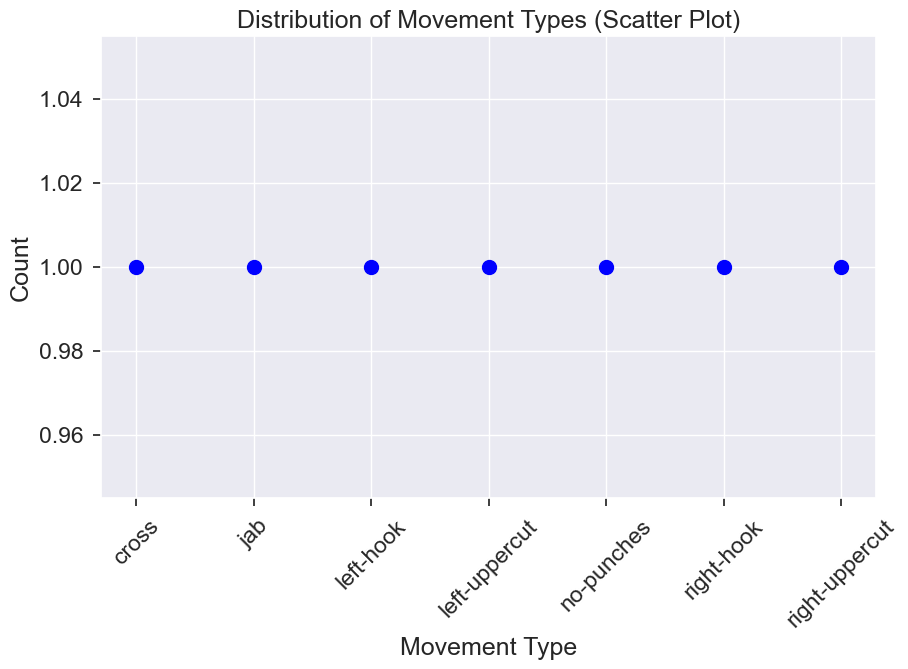

In [6]:
# Analyze movement types across all files with a scatter plot
movement_counts = pd.Series({file: df['movement_type'].iloc[0] for file, df in dfs.items()}).value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(movement_counts.index, movement_counts.values, s=100, color='b')  # s controls the size of the points
plt.title('Distribution of Movement Types (Scatter Plot)')
plt.xlabel('Movement Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better visibility
plt.show()

From this scatter plot we can draw two conclusions:
    
   **1. Equal Representation**: Each movement type is represented exactly once across the files, meaning there is no redundancy or imbalance in terms of movement types.
   
   **2. Unique Movement Types**: Each file corresponds to a distinct movement type (as intended) and they are not repeated across files. 